In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

rawdata = pd.read_csv("undergrad_takehome_2020.csv")

In [ ]:
#Part 1 – Summary statistics and plots

In [270]:
#Compute the net income of each entry
rawdata['Net income'] = rawdata['Gross revenue'] - rawdata['Fixed cost'] - rawdata['Variable cost'] -rawdata['Rental cost']

#Compute the annual profit margin
aggregate_1 = rawdata.groupby(rawdata['Location number']).sum()
aggregate_1['Profit margin'] = (aggregate_1['Net income'] / aggregate_1['Number of products'])

In [271]:
aggregate_1['Profit margin'].mean() #Mean of Annual Profit Margin -- 1743.7514646486309

1743.7514646486309

In [272]:
aggregate_1['Profit margin'].median()#Median of Annual Profit Margin -- 1476.0668245501743

1476.0668245501743

In [273]:
#convert aggregated location number back to 1-333 for x-axis in scatterplot
aggregate_1['Location number'] = aggregate_1['Location number']//12 

In [276]:
aggregate_1.head() #Check the schema of dataframe

,Location number,Month,Gross revenue,Fixed cost,Variable cost,Rental cost,Number of products,Owned,Net income,Profit margin
Location number,,,,,,,,,,
1,1,78,5.447389e+08,1.108956e+08,2.793687e+08,4390560,53424,0.0,1.500840e+08,2809.299529
2,2,78,3.559730e+08,7.287395e+07,1.937291e+08,783240,54024,0.0,8.858672e+07,1639.766103
3,3,78,3.317718e+08,6.429775e+07,1.848279e+08,0,55440,12.0,8.264618e+07,1490.731961
4,4,78,2.639843e+08,6.410409e+07,1.432398e+08,1696920,53772,0.0,5.494349e+07,1021.786223
5,5,78,1.890016e+08,4.475050e+07,1.037553e+08,894000,54396,0.0,3.960178e+07,728.027401


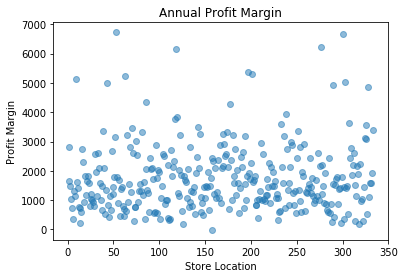

In [278]:
#Visualize the profit margin across locations
plt.scatter(aggregate_1['Location number'], aggregate_1['Profit margin'], alpha=0.5)
plt.title("Annual Profit Margin")
plt.xlabel("Store Location")
plt.ylabel("Profit Margin")
plt.show()
#Most of the points seem to fall into the band between 0 and 5000, showing a normal distribution overall. However, 
#some of the stores have profit margin over 5000 and seem to outperfom the other locations.

In [281]:
#Pull up the locations that are having way higher profit margin for further analysis
aggregate_1.loc[aggregate_1['Profit margin'] > 5000]

,Location number,Month,Gross revenue,Fixed cost,Variable cost,Rental cost,Number of products,Owned,Net income,Profit margin
Location number,,,,,,,,,,
9,9,78,8.129180e+08,1.403155e+08,3.780220e+08,0,57468,12.0,2.945805e+08,5125.992123
53,53,78,1.200481e+09,2.317061e+08,5.915411e+08,4138080,55428,0.0,3.730962e+08,6731.185816
63,63,78,9.628583e+08,1.613098e+08,5.129023e+08,4178880,54420,0.0,2.844673e+08,5227.257392
118,118,78,9.660039e+08,1.499075e+08,4.630773e+08,3715680,56712,0.0,3.493035e+08,6159.251638
197,197,78,9.240643e+08,1.511196e+08,4.735727e+08,3431400,55128,0.0,2.959405e+08,5368.243896
201,201,78,9.844938e+08,2.006377e+08,4.897594e+08,8277000,53760,0.0,2.858197e+08,5316.587561
276,276,78,1.088887e+09,1.692206e+08,5.734866e+08,6564120,54552,0.0,3.396158e+08,6225.541818
300,300,78,1.088825e+09,1.706193e+08,5.395776e+08,0,56832,12.0,3.786283e+08,6662.238115
303,303,78,8.593133e+08,1.509103e+08,4.260014e+08,6430920,54888,0.0,2.759706e+08,5027.886335


In [ ]:
#2) Plot the monthly and quarterly aggregate revenue across all stores.

In [282]:
#Create the second dataframe that aggregates across each month
aggregate_2 = rawdata.groupby(rawdata['Month']).sum()

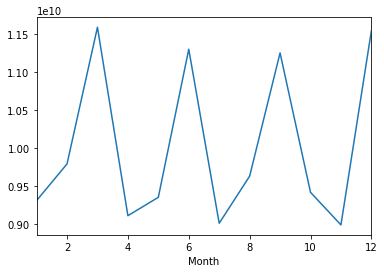

In [283]:
aggregate_2['Gross revenue'].plot()#Months 3, 6, 9, 12 have the highest revenue

In [284]:
#Create the new column, Quarter, for quarterly analysis
conditions = [
    rawdata['Month'].isin([1, 2, 3]),
    rawdata['Month'].isin([4, 5, 6]),
    rawdata['Month'].isin([7, 8, 9])]
choices = ['Q1', 'Q2', 'Q3']
rawdata['Quarter'] = np.select(conditions, choices, default='Q4') #quarterly

#Create the third dataframe that aggregates across each quarter
aggregate_3 = rawdata.groupby(rawdata['Quarter']).sum()

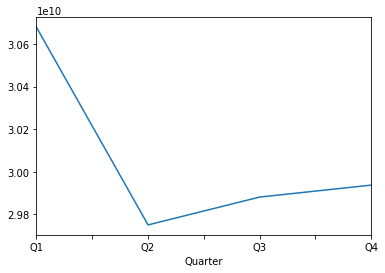

In [285]:
aggregate_3['Gross revenue'].plot()#peak at Q1, lowest at Q2, with the largest difference being around 1e9

In [ ]:
#Part 2 – Cleaning the data

In [286]:
#Select all leased stores
leased_stores = rawdata[(rawdata['Owned'] == False) & (rawdata['Month'] ==1)]
#monthly rate is constant across the whole year

owned_stores = rawdata[(rawdata['Owned'] == True) & (rawdata['Month'] ==1)] #monthly rate for the owned store

In [ ]:
#Imputed rent: average rent for all stores in the state
leased_stores['Adjusted rent'] = leased_stores.groupby(['State'])['Rental cost'].transform('mean') #assuming stores have the same size

#Create the "State-Rent" mapping table
rent_table = leased_stores[['State', 'Adjusted rent']].drop_duplicates()
df_merge = pd.merge(rawdata, rent_table, on='State')

#if owned is false, keep the original rent; o.w add in the average rent price of that state as the imputed rent
df_merge.loc[df_merge['Owned'] == False, 'Adjusted rent'] = df_merge['Rental cost'] 

In [ ]:
#Computed Adjusted profit margin using the imputed rent for all stores
df_merge['Net income'] = df_merge['Gross revenue'] - df_merge['Fixed cost'] - df_merge['Variable cost'] -df_merge['Adjusted rent']
aggregate_4 = df_merge.groupby(df_merge['Location number']).sum()
aggregate_4['Adjusted profit margin'] = (aggregate_4['Net income'] / aggregate_4['Number of products'])


In [287]:
aggregate_4['Adjusted profit margin'].mean() #1739.92, slightly smaller than original margin

1739.923403853427

In [288]:
aggregate_4['Adjusted profit margin'].median() #1470.08, also slightly smaller than original margin

1470.0773239000584

In [ ]:
#Part 3 – Quantify drivers of success:
#identify factors that have led to historical outperformance across locations. 
#maximizing profit margin at each location. 

In [ ]:
#state-location
df_merge.head()

In [290]:
df_merge['State'].unique()

array(['TX', 'IL', 'GA', 'NJ', 'CA', 'CO', 'WA'], dtype=object)

In [ ]:
#Create the dataframe that aggregates across states, with the adjusted rent
aggregate_5 = df_merge.groupby('State').sum()#group by state
aggregate_5['Adjusted profit margin'] = (aggregate_5['Net income'] / aggregate_5['Number of products'])
aggregate_5.sort_values(by = ['Adjusted profit margin'])

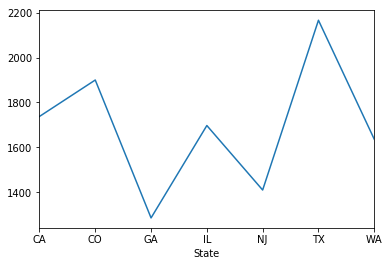

In [289]:
aggregate_5['Adjusted profit margin'].plot()

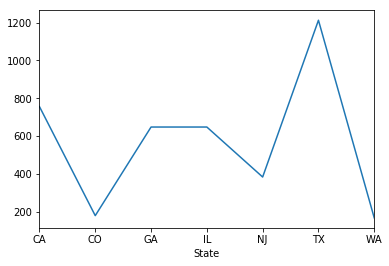

In [291]:
df_merge.groupby('State').count()['Location number'].plot() # seems like num of stores and 
#adj profit margin have the same distribution for most of the states except GA and CO


In [ ]:
#month-time
#Create the dataframe that aggregates across Months, with the adjusted rent
aggregate_6 = df_merge.groupby('Month').sum()#monthly
aggregate_6['Adjusted profit margin'] = (aggregate_6['Net income'] / aggregate_6['Number of products'])

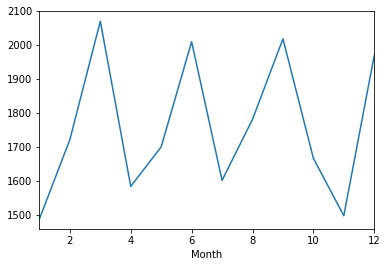

In [292]:
aggregate_6['Adjusted profit margin'].plot()

In [ ]:
aggregate_6.sort_values(by = ['Adjusted profit margin'])

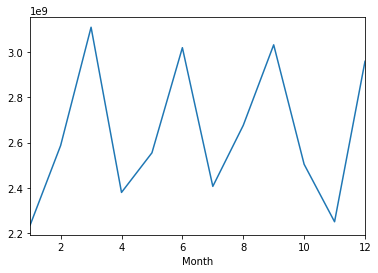

In [293]:
aggregate_6['Net income'].plot()#3, 6, 9, 12 have higher income, increases number of products in these months

In [ ]:
#yearly income of each of the 333 stores
aggregate_7 = df_merge.groupby('Location number').sum()
aggregate_7['Adjusted profit margin'] = (aggregate_7['Net income'] / aggregate_7['Number of products'])


In [ ]:
aggregate_7.sort_values(by = ['Adjusted profit margin'])

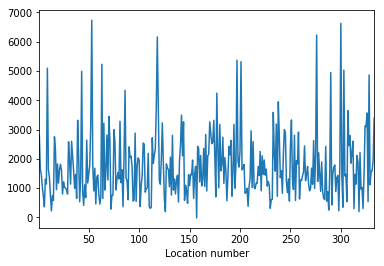

In [294]:
aggregate_7['Adjusted profit margin'].plot()

In [ ]:
aggregate_7.nlargest(5, 'Adjusted profit margin') #only 2 are owned stores, loc: 300 and 9

In [295]:
df_merge.loc[df_merge['Location number'] ==197]#check for details of outperfoming stores

,Location number,Month,State,Gross revenue,Fixed cost,Variable cost,Rental cost,Number of products,Owned,Net income,Quarter,Adjusted rent
660,197,1,TX,72918989.88,11960777.78,37990906.50,285950,4594,False,22681355.60,Q1,285950.0
661,197,2,TX,72732978.68,11827194.90,37062826.88,285950,4594,False,23557006.90,Q1,285950.0
662,197,3,TX,89349075.92,14772555.81,44752967.88,285950,4594,False,29537602.23,Q1,285950.0
663,197,4,TX,67102664.83,12248138.38,35249522.46,285950,4594,False,19319053.99,Q2,285950.0
664,197,5,TX,70268439.49,11668680.58,36220575.02,285950,4594,False,22093233.89,Q2,285950.0
665,197,6,TX,84012785.97,14694832.49,42874793.54,285950,4594,False,26157209.94,Q2,285950.0
666,197,7,TX,70981977.81,12104812.25,35707565.38,285950,4594,False,22883650.18,Q3,285950.0
667,197,8,TX,71381124.82,10781936.06,37280421.76,285950,4594,False,23032817.00,Q3,285950.0
668,197,9,TX,88843441.28,14213276.82,44429949.83,285950,4594,False,29914264.63,Q3,285950.0
669,197,10,TX,73214840.60,11489972.34,37173887.56,285950,4594,False,24265030.70,Q4,285950.0


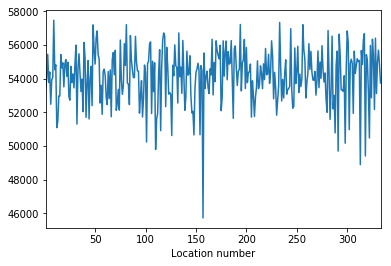

In [296]:
aggregate_7['Number of products'].plot()

In [ ]:
#yearly income of each of the 333 stores
aggregate_8 = df_merge.groupby('Quarter').sum()
aggregate_8['Adjusted profit margin'] = (aggregate_8['Net income'] / aggregate_8['Number of products'])

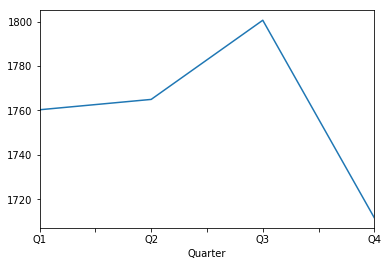

In [297]:
aggregate_8['Adjusted profit margin'].plot()